<a href="https://colab.research.google.com/github/GioSak27/Ejercicios_diplomado_2024/blob/main/Data_Analyst_Assignment_1_giovana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [ ]:
# YOUR CODE HERE:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio
import geopandas as gpd
import plotly.graph_objects as go
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/ My \Drive/Colab Notebooks/Archivos_excel

/content/drive/ My Drive/Colab Notebooks/Archivos_excel


In [3]:
df = pd.read_excel('Assignment_1.xlsx')

In [4]:
df.head()

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.4
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.4
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.4
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.3
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.4


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


***Para responder la primera parte necesitamos recordar el flujo del sumunistro. Entonces para saber cuantos casos únicos se están siguiendo (tranking) necesitamos generar el recuento único de la columna asset_id que es el ID único del activo en la prueba piloto.***

In [ ]:
# YOUR CODE HERE:
df.asset_id.unique()

array([  2,  37,  52,  58,  59,  62,  70,  84, 102, 145, 149, 159, 167,
       170, 181, 182, 200, 205])

In [ ]:
df.asset_id.nunique()

18

**Osea que tenemos 18 trackings únicos.**


**Para las zonas y subzonas que podemos ver vamos a resumir la variable 'Zone' y contar cuantas son en total**

In [ ]:
df.Zone.unique()

array(['dock_doors_DC1', 'dock_doors_DC2', 'Forklift3_DC1',
       'pallet_assembly_DC1', 'PhoneKit1Bridge', 'PhoneKit2Bridge',
       'PhoneKit2GW', 'point_of_sale_Store', 'receiving_Store',
       'staging_DC1', 'staging_DC2', 'store_back_Store',
       'store_front_Store', 'Forklift1_DC1', 'PhoneKit1GW'], dtype=object)

**Contabilizando las etiquetas únicas tenemos un total de 15 zonas en donde se encuentran los rastreadores a lo largo de la cadena de suministro.**

In [ ]:
df.Zone.nunique()

15

**Un punto de interés viene representado en la variable zona, pero también menciona que una subzona puede ser la puerta del muelle (Dock Doors), esto nos dice que basados en el flujo de la cadena de suministro, cruzar la varible 'Site' con la variable 'Zone' nos da cuantos puntos de interes hay en cada zona. Describiendo 15 puntos de interés en 4 zonas.**

In [5]:
df.groupby(['Site']).Zone.nunique()

Site
DC 1       5
DC 2       2
Store      4
Transit    4
Name: Zone, dtype: int64

### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

**Sabemos que el rango es un intervalo en el que oscila en este caso la temperatura. Por lo tanto usamos la segunda parte para traer el mínimo y el máximo de la variable Temperature_C. Al final del cálculo muestro la distribución de la temperatura según los registros (solo mostrare la temperatura en grados Celsius)**

In [ ]:
# YOUR CODE HERE:
df.Temperature_C.min()

19.0

In [ ]:
df.Temperature_C.max()

44.0

In [ ]:
range_C = {df.Temperature_C.min(),df.Temperature_C.max()}
print(range_C)

{19.0, 44.0}


In [ ]:
df.groupby(['Temperature_C']).Temperature_C.count()

Temperature_C
19.00    1
19.13    1
19.20    1
19.35    1
19.39    1
        ..
43.50    3
43.55    1
43.67    2
43.79    1
44.00    5
Name: Temperature_C, Length: 972, dtype: int64

## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

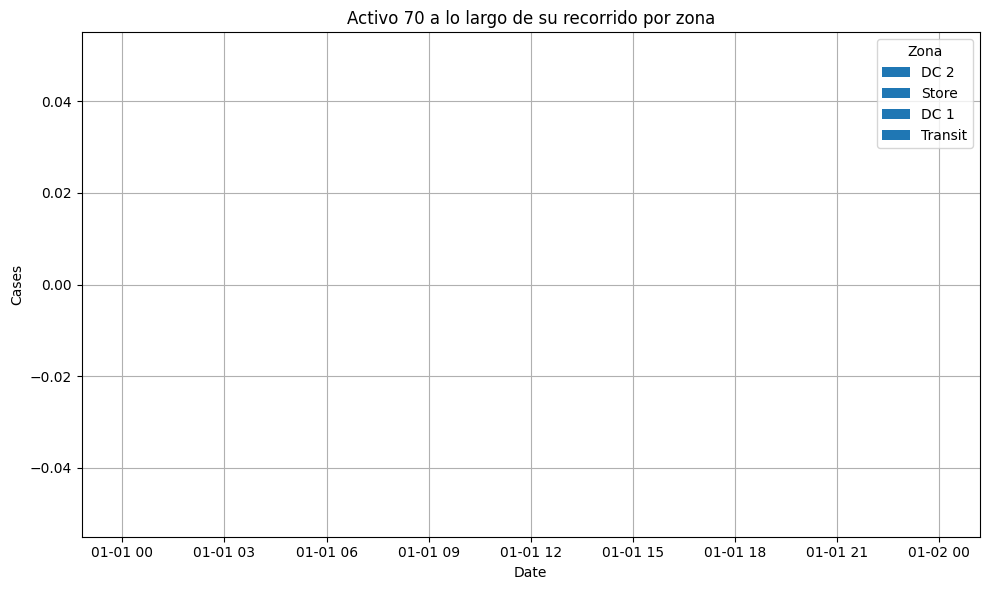

In [11]:
# YOUR CODE HERE:
# Primero vamos a convertir el objeto time_est en objeto de tiempo
df['time_est'] = pd.to_datetime(df['time_est'])
#parametros de la gráfica
plt.figure(figsize=(10,6))
#Recorrido por cada zona
for Site in set(df['Site']):
    Site_data = df[df['asset_id'] == '70']
    plt.bar(Site_data['time_est'],Site_data['Zone'],label=Site)
    plt.title('Activo 70 a lo largo de su recorrido por zona')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(title='Zona')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



In [ ]:
# YOUR CODE HERE:

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
# YOUR CODE HERE:


# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [ ]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

YOUR TEXT ANSWER HERE
